<a href="https://colab.research.google.com/github/IvanKatorgin/math-for-DS/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Аналитика больших данных". Домашнее задание 2. Машинное обучение и Data Science. Каторгин И.П.

Домашнее задание:
- взять датасет homework.csv;
- предсказать значение столбца MEDV на основе других признаков;
- решить задачу регрессии, используя алгоритм линейной регрессии;
- оценить качество регрессии при помощи метрики MSE.

In [ ]:
import pandas as pd, numpy as np, math, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Загрузим и поизучаем данные

In [ ]:
df = pd.read_csv('homework.csv', encoding = "utf-8", sep = ',')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
df.isna().mean() * 100

ID         0.0
crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

Пропуски в данных не обнаружены

In [ ]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Построим график по параметрам crim, medv

Text(0.5, 1.0, 'scatter график по параметрам crim, medv')

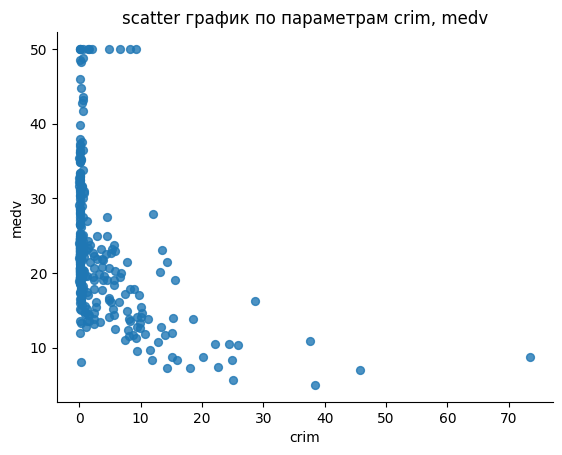

In [ ]:
# @title crim vs medv

df.plot(kind='scatter', x='crim', y='medv', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('scatter график по параметрам crim, medv')

Построим график по параметрам rm, medv

Text(0.5, 1.0, 'scatter график по параметрам rm, medv')

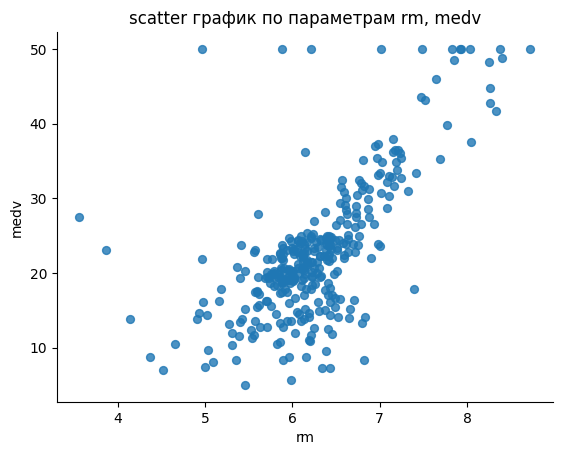

In [ ]:
# @title rm vs medv

df.plot(kind='scatter', x='rm', y='medv', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('scatter график по параметрам rm, medv')

Оставляем числовые признаки, по которым будем определять значение столбца MEDV

In [ ]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
data = pd.DataFrame(df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']])
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [ ]:
medv = pd.DataFrame(df[['medv']])
medv

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
...,...
328,17.5
329,22.4
330,20.6
331,23.9


Разделим данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)

In [ ]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, medv, test_size=0.2, random_state=42)

In [ ]:
len(y_test)

67

In [ ]:
y_test

,medv
25,24.7
309,19.6
73,19.8
195,27.9
57,23.9
...,...
280,14.3
3,36.2
77,21.2
311,13.8


Строим модель линейной регрессии

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Оценить качество на тестовой выборки
y_predict = model.predict(X_test)
y_predict

array([[24.50141484],
       [23.35218616],
       [22.56081814],
       [33.27103664],
       [24.39179151],
       [14.38881491],
       [17.58440531],
       [30.22482519],
       [16.3814254 ],
       [25.75001663],
       [25.95089381],
       [19.28314443],
       [20.40895745],
       [34.25669378],
       [21.96702176],
       [34.11284465],
       [22.27120348],
       [16.98697062],
       [24.94339935],
       [16.91612324],
       [35.99655208],
       [31.47377712],
       [23.19704537],
       [28.31771819],
       [15.95754574],
       [41.80363869],
       [ 7.41212947],
       [ 1.23819578],
       [31.13731355],
       [10.43444587],
       [19.36636029],
       [20.71859579],
       [27.04099002],
       [14.66393284],
       [19.12266966],
       [12.29750678],
       [27.99251079],
       [ 4.41875062],
       [16.59733342],
       [22.59503327],
       [23.5632186 ],
       [21.51633999],
       [25.34424208],
       [39.23942244],
       [35.91224412],
       [20

In [ ]:
mean_squared_error(y_test, y_predict)

23.486735195426004

Выводы:
1. Построена модель предсказания значения столбца MEDV на основе других признаков;
2. Решена задача регрессии, используя алгоритм линейной регрессии;
3. Качество регрессии, оцененное при помощи метрики MSE, составило 23,49